# Attendance

[The link to SEAts](https://goldsmithscollege.sharepoint.com/sites/intranet-supporting-students/SitePages/SEAtS--QR-codes-for-check-in.aspx?utm_campaign=SEAtS%20reminder%2027.09.22&utm_source=emailCampaign&utm_content=&utm_medium=email)

[Evaluations!](http://www.doc.gold.ac.uk/evaluation) 🙏

---

# Exam

## Friday 19th January, 10:00 AM, 2h15

- Part A, 45 minutes
- Part B, **choose two questions** (out of three), 45 minutes each

## Do the quizzes!!

If you can do the quizzes, the exam is fine.

---

# Coursework 2

In [1]:
import tensorflow as tf
import numpy as np

from IPython.display import YouTubeVideo

import matplotlib.pyplot as plt

## Options

### 1. **DL workflow**

Find the best model for a particular dataset using techniques from Topic 5 (vision) or Topic 6 (sequences).

## Options

### 2. **Generative**

A **creative project** based on the generative models of DLWP chapter 12 (using DLWP code as **a starting point** and creating **original wor**k on that basis, with additional credit for **changes** and **extensions** to the code, and an **exploration** of the capability of a generative technique, and/or **novel applications**).

Even as you use DLWP or lecture code, please make sure to **start a new notebook** for your submission, instead of just modifying one of the lecture notebooks.

## Credit
 (up to 70 marks)

- Report structure and quality as a document (avoid excessive repetition)
- Adherence to the DL workflow (option 1)
- A systematic investigation
- Interpretation of results

## Extra credit

(up to 30 marks)

- Clean, modular code
- A dataset external to DLWP and tensorflow
- Demonstrable understanding of DLWP part 2 (Topics 5-8) concepts

## Submission

- Reference any pretrained model and all datasets
- Reference any code that is not original
- Reference any other source e.g. books, kaggle

Submit a single ZIP file containing your executed Jupyter notebook (optionally also an html export), as well as your produced outputs, and intermediary results.

**If you use large datasets or pretrained models, please add external download links or describe the steps you took to obtain those, rather than include them in the submission**

## Please look at the grading scheme!

In [26]:
def mnist_example(n_hidden, n_layers):
    # load
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

    # preprocess
    train_images = train_images.reshape((60000, 28 * 28))
    train_images = train_images.astype('float32') / 255
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype('float32') / 255

    train_labels = tf.keras.utils.to_categorical(train_labels)
    test_labels = tf.keras.utils.to_categorical(test_labels)

    # split into partial train & val
    # NOTE: you can also skip this step and use 'validation_split' in the fit() function
    val_images = train_images[:10000]
    val_labels = train_labels[:10000]
    partial_train_images = train_images[10000:]
    partial_train_labels = train_labels[10000:]

    # build
    network = tf.keras.models.Sequential()
    for _ in range(n_layers):
        network.add(tf.keras.layers.Dense(n_hidden, activation='relu', input_shape=(28 * 28, )))
    network.add(tf.keras.layers.Dense(10, activation='softmax'))
    network.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    # train
    history = network.fit(
        partial_train_images,
        partial_train_labels,
        epochs=10,
        batch_size=128,
        validation_data=(val_images, val_labels),
        # validation_split=0.2. # automatic validation split
    )

    # plot
    fig, axs = plt.subplots(nrows=1,ncols=2, constrained_layout=True, figsize=(10,3))
    axs[0].plot(range(len(history.history['loss'])), history.history['loss'], label="loss")
    axs[0].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label="val loss")
    axs[0].legend()
    axs[1].plot(range(len(history.history['accuracy'])), history.history['accuracy'], label="accuracy")
    axs[1].plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label="val accuracy")
    axs[1].legend()
    plt.show()

Epoch 1/10
391/391 [==============================] - 13s 26ms/step - loss: 1.5371 - accuracy: 0.5205 - val_loss: 1.1427 - val_accuracy: 0.6537
Epoch 2/10
391/391 [==============================] - 8s 22ms/step - loss: 1.0169 - accuracy: 0.6942 - val_loss: 0.9078 - val_accuracy: 0.7374
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 0.8544 - accuracy: 0.7537 - val_loss: 0.7897 - val_accuracy: 0.7810
Epoch 4/10
391/391 [==============================] - 10s 25ms/step - loss: 0.7404 - accuracy: 0.7920 - val_loss: 0.6901 - val_accuracy: 0.8067
Epoch 5/10
391/391 [==============================] - 10s 25ms/step - loss: 0.6636 - accuracy: 0.8073 - val_loss: 0.6325 - val_accuracy: 0.8173
Epoch 6/10
391/391 [==============================] - 9s 23ms/step - loss: 0.6199 - accuracy: 0.8167 - val_loss: 0.6008 - val_accuracy: 0.8260
Epoch 7/10
391/391 [==============================] - 10s 24ms/step - loss: 0.5926 - accuracy: 0.8263 - val_loss: 0.5810 - val_accuracy: 0.

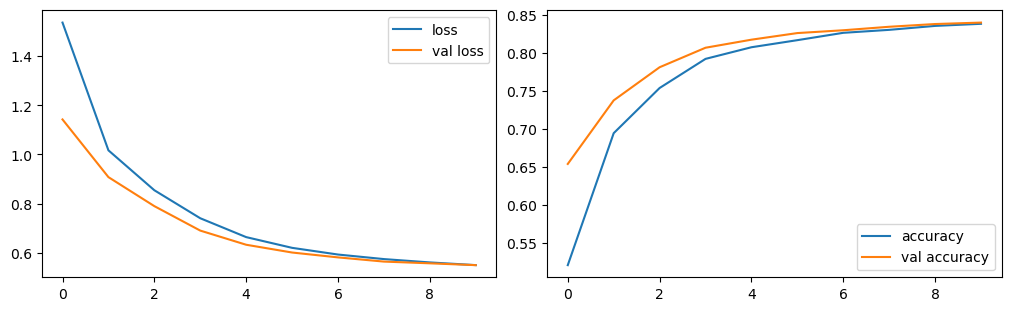

In [27]:
mnist_example(n_hidden=4, n_layers=1)

Note that we only reach .54 of validation loss, and .84 of validation accuracy: we are **underfitting**.  
A model is underfitting on the training loss as long as that loss is above zero!  
Once the training loss is zero it is said to **interpolate** the data: every data point is accounted for.

Epoch 1/10
391/391 [==============================] - 22s 41ms/step - loss: 0.3350 - accuracy: 0.8973 - val_loss: 0.1843 - val_accuracy: 0.9518
Epoch 2/10
391/391 [==============================] - 13s 34ms/step - loss: 0.1270 - accuracy: 0.9654 - val_loss: 0.1148 - val_accuracy: 0.9686
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 0.0891 - accuracy: 0.9764 - val_loss: 0.1414 - val_accuracy: 0.9662
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 0.0719 - accuracy: 0.9817 - val_loss: 0.1098 - val_accuracy: 0.9777
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 0.0616 - accuracy: 0.9844 - val_loss: 0.1126 - val_accuracy: 0.9773
Epoch 6/10
391/391 [==============================] - 13s 32ms/step - loss: 0.0560 - accuracy: 0.9867 - val_loss: 0.1072 - val_accuracy: 0.9778
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 0.0501 - accuracy: 0.9876 - val_loss: 0.2069 - val_accuracy:

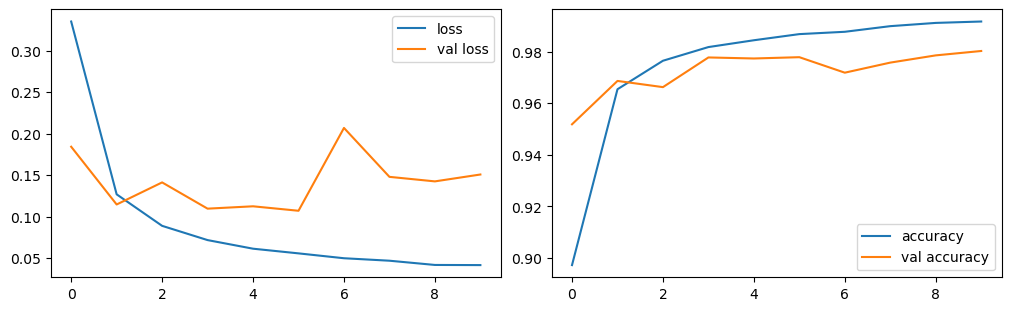

In [28]:
mnist_example(n_hidden=512, n_layers=5)

Here we are **overfitting** rather quickly, with our validation loss starting to diverge after one epoch, and our validation accuracy starting to stagnate roughly around the same time!

### Baseline

A common mistake I saw in CW 1: the baseline is calculated on the basis of the **data**, not just of the **classes**.

If you take the example of the IMDB dataset for sentiment. A random-guess baseline can be used (with an accuracy of roughly 50%), because **there are as many positive as negative reviews in the dataset**.

Not because there are two classes.

If we had an imbalanced dataset with 80% of one class and 20% of another, the commonsense baseline to use is to **predict the most likely class** (the **mode** of our distribution), which in this case gives you an 80% accuracy on average.

*If you know a coin is biased towards heads rather than tail, you know that betting on heads all the time will make you win!*

### Baseline breakdown

1. Classification or Regression? 
    1. *Classification*: is the dataset balanced (as many **samples** of each class)?  
       1. **Yes**, as many samples of each class: *random guess* is your best bet, giving you an expected accuracy of :  
       $\frac{1}{classes}$ (1/2 for two classes, 1/10 for ten classes)  
       2. **No**, one class has more sample than the rest: predicting *this class* will give you better results than a random guess, do that.  
       Your expected accuracy is $p(\text{most represented class})$ (with a dataset of 10 classes, if your most represented class is 14% of it, that's your baseline!).  
    2. *Regression*: what are you predicting?  
        1. A separate feature (for instance: prices), try computing the **mean** of your data, and see what **MAE** you are getting when using only the mean as your model's prediction;  
        2. Something else (e.g. the weather temperature, which is also part of your input data), then it's a custom estimation (like "the temperature is the same in 24h as it is now").

### Regularisation

In practice, it means `Dropout` or `l1/l2` kernel regularisers!

*If you do not overfit for whatever reason (e.g. enough data) either __use some regularisation anyway__ or __write a section on the absence of regularisation and why you think you didn't overfit__ (e.g. enough data acts as a natural regulariser!).*

### Optimal epoch workflow

1. Train using `partial_training` and `validation`;
2. Find the best validation value and epoch;
3. Retrain a new network with the same hyperparmeters:
    - **until the best-performing epoch**;
    - **on the whole training set (no validation)**;
4. Test on the test set (using `model.evaluate(x_test, y_test)`).

```python
    # EXPERIMENTS
    history = network.fit(
        partial_train_images,
        partial_train_labels,
        epochs=10,
        batch_size=128,
        validation_data=(val_images, val_labels),
        # validation_split=0.2. # automatic validation split
    )
```

```python
    # FINAL MODEL
    # programmatically select the best epoch
    best_epoch = np.argmax(history["val_acc"])
    print(f"The best epoch for validation is {best_epoch}")
    history = network.fit(
        train_images,
        train_labels,
        epochs=best_epoch, # TRAIN UNTIL BEST EPOCH
        batch_size=128,    # NO VALIDATION ANY MORE
    )
```
```python
    results = model.evaluate(x_test, y_test) # EVALUATE ON THE TEST SET
```

### Systematic hyperparameter optimisation

The original intent is to give those marks when at least **two hyperparameters** have been tuned.

Note the **systematic**: you need to show that you are *searching* for better performance, using a plan or strategy, and changing the hyperparameters accordingly.

### Advanced DL & best practices: examples from topic 7

- architectures patterns like residual connections, batch norm or layer norm, more than one input/output with functional syntax;
- learning rate schedules;
- TPU training;
- ensembling (train more than one model, pool their predictions);

### Option 2 Generative DL

The idea is to explore one of the generative DL techniques we have seen in the last two weeks.

Start with the lecture notebooks, and build on top of that.

The only thing I require is that **you do not just hand in a modified lecture notebook**.

**Start from scratch, in a blank notebook, and import the code you need manually.**

Please do include attempts, even if failed ones, we want to see your process!

---

# 14 Conclusions

## 14.1 Key concepts in review

### 14.1.1 Various approaches to AI

<!-- <img  style="width: auto; height: 600px;" src="images/MIT_DeepLearning_L1.pdf.png"> -->
<img  style="width: auto; height: 600px;" src="https://drive.google.com/uc?id=1qLjS1yl8HJUREBTKaEXjhV5LKesB-N-U">

<small>[MIT 6.S191 Introduction to Deep Learning](http://introtodeeplearning.com)</small>

### 14.1.2 What makes deep learning special within the field of machine learning

DL, in only a few years, has achieved a range of tasks that were previously considered to be very difficult for computers:
- machine perception;
- information extraction from images, videos and sound;
- speech recognition;
- smart assistants;
- machine translation;
- much, much more...

Some practitioners (e.g. F. Chollet) claim that given enough human-annotated training data, DL models can be equivalent to humans in these kind of tasks.

Some claim that 'perception has been solved'.

We are in the middle of a period of intense interest and hype – an AI *summer*.

Deep Learning stands to transform many industries and businesses *even if no further progress is made*.

### 14.1.3 How to think about deep learning

#### The Model

Deep Learning models apply a series of **simple geometric transformations** to vectorised data.

A chain of simple transformations creats a **complex transformation from an input to a target space**.

The transformations must be **differentiable**.

#### Training

The layer parameters determining transformations change during training in order to **lower a loss function**.

This loss must also be **differentiable**.

Premise: meaning can be derived by smooth mappings between vector spaces.

But meaning can be represented in other ways, for example by **graphs**.

The representation of meaning by graphs was the original stimulus for *connectionism* and was realised in artificial neural networks.

However ANN's bear little resemblance to the brain.

DL experts talk about *layered representations*, *hierarchical representation learning* and *deep differentiable models of chained geometric transforms*.

Despite this jargonised, abstract viewpoint (Chollet's), deep learning concepts and implementations derive from (artificial) neural networks.

It is always good to have **several, ideally complementary ways** of thinking about the same thing:  

*Artificial neurons sending signals along connecting wires...*

<!-- <img  style="height: 500px;" src="images/stanford.neuron.brain.png"> -->
<img  style="height: 500px;" src="https://drive.google.com/uc?id=1j0qbpQclMhA2Wu13j40exP_tC9xcsApP">

<small>Source: [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/2017/syllabus.html), lecture 4</small>

### 14.1.4 Key enabling technologies

- **Algorithms**: incremental innovations, especially since 2012;
- **Big data**: large amounts of data;
- **GPU/TPU**: fast parallel GPU computation: the NVIDIA gaming GPU was particularly important;
- Open source/public **libraries/APIs**: CUDA, TensorFlow, PyTorch, Numpy, JAX...

### 14.1.5 The universal machine-learning workflow

-  Define the problem: 
    - what **data** is available, 
    - what are you trying to **predict**?
-  Identify a **measure of success**, e.g. the prediction accuracy;
-  Define an **evaluation procedure**: training/validation sets + a test set.

-  **Vectorise** and if necessary **normalise** data;
-  Develop a baseline model that beats a **common sense baseline**;
-  Tune **hyperparameters** according to **validation** performance;
-  First **overfit** then **regularise/downsize**.

---

## 14.1.6 Key network architectures

### Four families: 
- Dense;
- Convolutional;
- Recurrent;
- Attention-based (transformers).

Each type matches a particular task and encodes assumptions about the structure of the data i.e. a hypothesis space.

The network types can obviously be combined: for instance, dense layers are found everywhere, but almost never on their own!

### Note 

This is evolving **fast**. [Diffusion models](https://keras.io/examples/generative/ddim/) are at the peak of hype, you can bet that DLWP 3rd edition will include them.

| Data | Architecture |
| --- | --- |
| **General** | fully connected (dense) layers<sup>1</sup> |
| **Image** | 2D convnets, Transformers | 
| **Text** | RNNs, Transformers, also 1D convnets |
| **Time series** | RNNs, Transformers or 1D convnets |
| **Other types of sequence** | RNNs or convnets<sup>2</sup> |
| **Video** | 3D convnets<sup>3</sup> |
| **Volumetric** | 3D convnets |

<small>1: These days mostly encountered *within* other networks, rather than on their own.<br>
2: "1D convnets can also be used for translation-invariant, continuous sequence data, such as birdsong waveforms.", DLWP, p.436.<br>
3: Also possible: 2D convnets for frame level feature extraction followed by an RNN, Transformer or convnet to process the resulting sequence.</small>


---

### Densely connected networks

A stack of dense layers.

No specific structure in the data is assumed. (2D convolutional layers assume *local* structure.)

Used for categorical data (e.g. attributes such as in the Boston Housing dataset).

Also used as the final classification or regression stage of most other networks.

#### Binary classification

- The final layer is a single sigmoid unit;
- The model is trained with the binary cross-entropy loss function.

```python
num_input_features = 16
inputs = tf.keras.Input(shape=(num_input_features,))
x = tf.keras.layers.Dense(32, activation="relu")(inputs)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy")
```

#### Single label multi-class classification

- Number of final dense layer units = number of classes;
- Softmax activation;
- Categorical cross-entropy loss.

```python
num_classes = 10
inputs = tf.keras.Input(shape=(num_input_features,))
x = tf.keras.layers.Dense(32, activation="relu")(inputs)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
```


#### Multi-label multi-class classification

- Final layer of sigmoid units;
- Binary cross-entropy;
- `num_classes` copies of binary classification.

```python
inputs = tf.keras.Input(shape=(num_input_features,))
x = tf.keras.layers.Dense(32, activation="relu")(inputs)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy")
```


#### Regression

- Number of final units = number of values;
- Final units have no activation (any continuous value is possible);
- Loss is commonly MSE, but could be MAE (used as a metric in the book).

```python
num_values = 1
inputs = tf.keras.Input(shape=(num_input_features,))
x = tf.keras.layers.Dense(32, activation="relu")(inputs)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(num_values)(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="mse")
```


---

### Convolutional Networks

The same geometric transformation is applied to different spatial locations (local receptive fields/patches).

Resulting representations are **translation invariant** (can occur anywhere).

Applicable to **any image size** without change to the architecture.

Can be used for sequence processing if the sequence is translation invariant (not time series, but possibly text).

#### Architecture:
- Stacks of **convolutional and pooling layers**;
- Pooling layers **downsize/downsample** the data and **increase the spatial extent** of the filter;
- End the stack with a **flattening or a global pooling layer** in order to turn the feature maps into vectors;
- Then add a **dense classifier**.

Models like **Xception** with separable depthwise convolutions (separate spatial convolutions on each channel) are smaller, quicker to train and perform well.

```python
height, width, channels = 200, 200, 3
inputs = tf.keras.Input(shape=(height, width, channels))
```
```python
x = tf.keras.layers.SeparableConv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.SeparableConv2D(64, 3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.SeparableConv2D(64, 3, activation="relu")(x)
x = tf.keras.layers.SeparableConv2D(128, 3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.SeparableConv2D(64, 3, activation="relu")(x)
x = tf.keras.layers.SeparableConv2D(128, 3, activation="relu")(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
```
```python
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
```


---

### Recurrent Networks (RNNs)

Process sequences one step at a time.

They maintain a **state** or **memory** – the previous output.

Used for sequences without translation invariance.

E.g. for time series where the recent past is more informative than the distant past.

`tensorflow.keras` has three RNN layers: `SimpleRNN`, `GRU` and `LSTM`:

- `SimpleRNN` is not really used;
- `LSTM` is more powerful than the `GRU`, but is computationally more exensive.

```python
num_timesteps, num_features = 64, 128
inputs = tf.keras.Input(shape=(num_timesteps, num_features))
x = tf.keras.layers.LSTM(32)(inputs)
outputs = tf.keras.layers.Dense(num_classes, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy")
```

When stacking layers, inner layers should return **the full sequence of outputs**.

The final RNN layer returns only the last output which contains information about the whole sequence.

```python
num_timesteps, num_features = 64, 128
inputs = tf.keras.Input(shape=(num_timesteps, num_features))
x = tf.keras.layers.LSTM(32, return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(32, return_sequences=True)(x)
x = tf.keras.layers.LSTM(32)(x)
outputs = tf.keras.layers.Dense(num_classes, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy")
```

---

### Transformers

- They use **neural attention** ($softmax(Query \cdot Keys) \cdot Values$) to enrich input vectors with **contextual information**;
- Multiple heads allow the network to look up different types of information in the whole input;
- The attention mechanism ignores word order, so we use `PositionalEmbedding`;
- Complexity of $O(length^2 \times dim)$: faster than RNNs and ConvNets for shorter sentences!
- Use a **causal mask** in the decoder to enforce causality and prevent lookaheads into the future;

#### Encoder only (BERT)

```python
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
  # ↓ Encoder
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy")
```

#### Decoder only (GPT)

```python
inputs = tf.keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length,vocab_size, embed_dim)(inputs)
  # ↓ Decoder
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(
    inputs=x, encoder_outputs=x
) # x as both decoder & encoder!
outputs =tf.keras.layers.Dense(vocab_size, activation="softmax")(x)
                             # probability distribution over the vocab
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")    
```

#### Full (Transformer)
```python
# ↓ Encoder
encoder_inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
```
```python
# ↓ Decoder
decoder_inputs = tf.keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
                                         # inputs from decoder & encoder ↓
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)
decoder_outputs = tf.keras.layers.Dense(vocab_size, activation="softmax")(x)
```
```python
transformer = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.compile(optimizer="rmsprop", loss="categorical_crossentropy")
```


### 14.1.7 The space of possibilities

All of the following are learnable even if generalisation might be impossible.

| Input           | Output           | Task                         | Example                                                                |
| :---             | :---              | :---                          | :---                                                                    |
| category        | category         | predictive healthcare        | medical records → prediction of treatment outcome                     |
| category        | continuous value | behaviour                    | website attributes → time spent on website                            |
| category        | continuous value | quality control              | product attributes → probability of failure                           |

| Input           | Output           | Task                         | Example                                                                |
| :---             | :---              | :---                          | :---                                                                    |
| image           | category         | doctor assistant             | medical slides → diagnosis                                            |
| image           | category         | self-driving vehicle         | dash-cam → steering commands                                          |
| image           | category         | board game                   | Go, chess images → next move                                          |
| image           | category         | age prediction               | selfies → age                                                         |
| image           | continuous value | diet helper                  | image of dish → calorie count                                         |
| images          | text             | captioning                   | image → short caption                                                 |
| images          | images           | super-resolution             | downsized inmages → hi res versions                                   |
| images          | images           | visual depth sensing         | image of indoor environment → depth map                               |

| Input           | Output           | Task                         | Example                                                                |
| :---             | :---              | :---                          | :---                                                                    |
| time series     | category         | weather                      | weather data in a grid of locations → prediction at a single location |
| time series     | category         | brain-computer interface     | EEG → computer commands                                               |

| Input           | Output           | Task                         | Example                                                                |
| :---             | :---              | :---                          | :---                                                                    |
| text            | text             | smart reply                  | emails → one-line replies                                              |
| text            | text             | answering questions          | general knowledge questions → answers                                 |
| text            | text             | summarising                  | long article → short summary                                          |
| text            | images           | conditioned image generation | short text → matching image                                           |
| text            | images           | logo generation/selection    | name and company description → logo                                   |

| Input           | Output           | Task                         | Example                                                                |
| :---             | :---              | :---                          | :---                                                                    |
| images and text | text             | visual QA                    | images and questions → answers                                        |
| video and text  | text             | video QA                     | short videos and questions about the contents → answers               |

---

## 14.2 The limitations of deep learning

The list of possibilities in 14.1 is impressive but DL has limitations.

- Imagine database of text descriptions of a software product. DL could never generate the source code.
- Even learning a simple learning algorithm is tremendously difficult.

Reasoning – as in designing software or the scientific method – is, or so Chollet states in ~2020, out of reach. 

X might be related to Y by a geometric transform, but the transform might be too complex; or, X and Y aren't connected by any such transform.

Stacking more layers may only palliate these problems.

DL maps space X to space Y with **continuous geometric transformations** given large amounts of human-annotated data.

DL models are like programs...

...but **only a (small) subset of all possible programs!**

So could *learnable programs* move AI towards reasoning and abstraction?

### 14.2.1 The risk of anthropomorphizing machine-learning models

We risk overestimating ML abilities. Ever more so today!

For instance, ML vision models do not *understand* images, at least not in the same way as we do. 

Our understanding is grounded in **experience** – being able to move and sense the world. 

ML models have no access to these experiences (for now). They are trained on very narrow examples.

### 14.2.3 Local generalization vs. extreme generalization

Even beyond, through experience, our access to broad training sets, here is another findamental dfference berween us and them (DL models).

We maintain *abstract* models of our social and natural environment and we use these models to anticpate and predict.

Thanks to that we are able to form representations of things that are novel to our experience, like dogs cooking or winnng the lottery.

We manage this feat through abstraction and reasoning.

#### Note

Some of these strategies (e.g. building a model of the world and acting accordingly) are studied in **Reinforcement Learning**, that unfortunately we haven't looked at this term.

#### Extreme generalisation

The ability to adapt to novel experiences despite a paucity of data is what Chollet calls *extreme generalisation*.

Deep nets generalise only locally. They only adapt to new situations that closely match the training set. 

<!-- <img src="images/chollet.local-vs-extreme-generalisation.p.448.png"> -->
<img src="https://drive.google.com/uc?id=1mcK8sReLVA7C1v3iStRfyelFRmqyj7q_">

<small>DLWP, p. 448</small>

#### Example: a trip to the moon

Imagine training a model to launch a moon-bound rocket. The training set would have to include millions of launch trials before the model could accuratley predict the voyage.

But humans, using reasoning and abstraction, develop rocket science, and we manage the task with only a few trials.

---

## 14.3 Setting the course toward greater generality in AI

### 14.3.1 On the importance of setting the right objective: The shortcut rule

"If you focus on optimizing one success metric, you will achieve your goal, but at the expense of everything in the system that wasn’t covered by your success metric. You end up taking every available shortcut toward the goal. Your creations are shaped by the incentives you give yourself." DLWP, p.459

As we have seen, models **will take the shortcut**, every time. (Are we *that* different?)

In many ways, seeing a model acting like that teaches you something about **the structure of the incentive/objective itself**!

---

## 14.4 Implementing intelligence: The missing ingredients

### 14.4.2 The two poles of abstraction

#### Value-centric analogy

<!-- <img src="images/chollet.value-centric-analogy.p.456.png"> -->
<img src="https://drive.google.com/uc?id=1fdCOUL6buTKhEQTj9se9cPOulcXoyhAm">

<small>DLWP, p. 456</small>

#### Program-centric analogy

<!-- <img src="images/chollet.program-centric-analogy.p.457.png"> -->
<img src="https://drive.google.com/uc?id=1M0KtaLNlzkx1mVnAGV9en2oIRwuPPJ0U">

<small>DLWP, p. 457</small>

#### Cognition as a combination of both kinds of abstraction

<!-- <img src="images/chollet.two-poles-abstraction.p.458.png"> -->
<img src="https://drive.google.com/uc?id=19NWrkKGW-asGefkKbRbJ9i2KGWfW_2tV">

<small>DLWP, p. 458</small>

### 14.4.3 The missing half of the picture

Deep Learning focusses almost exclusively on the first kind, "value-centric analogies".

It might be more fruitful to view these two aspects as belonging to a **spectrum**, with humans using different strategies at different times.

---

## 14.5 The future of deep learning

- *Models closer to computer programs*: richer primitives than the current differentiable layers, leading to abstraction and reasoning;
- *A fusion between deep learning and discrete search over program spaces*: combining intuition/perception and reasoning/planning;
- These new models would require *new forms of learning*;
- *Models that require less human involvement* i.e. more autonomy for tuning.
- *Greater and systematic reuse of previously learnt features and architectures* such as meta-learning with reusable and modular program subroutines.

These projections are appplicable to unsupervised, self-supervised and reinforcement learning.

### 14.5.1 Models as programs

Current AI reasoning relies on hardcoding e.g. search algorithms, graph manipulation and formal logic.

- **AlphaGo**, for example, the intelligence is hardcoded as a [Monte-Carlo Tree Search](https://en.wikipedia.org/wiki/Monte_Carlo_tree_search). Learning from data only occurs in specialised submodules.
- **RNNs** are less restricted than feedforward nets becuase they apply simple geometric transformations within a feedback loop. 

#### Program synthesis

If the system had access to **programming primitives** such as `if`, `while`, variables, disk storage, sorting operations, data structures (lists, hash tables etc.), the hypothesis space would far exeed that of current models.

**Program synthesis** searches to for simple programs automatically, and terminates when input-output pairs have been matched.

But instead of modifying a hardcoded model, program synthesis generates *source code*.

One could imagine a augmenting Deep Learning models with program synthesis capabilities.

### Beyond backpropagation

Deep Learning/program synthesis hybrids will likely no longer be differentiable. So, we cannot use backpropagation

But there are alternatives, such as optimisers that make little assumption about the loss function (or, at least, do not assume continuity and smoothness):
- [genetic algorithms](https://en.wikipedia.org/wiki/Evolutionary_computation);
- [simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing);
- [swarm intelligence](https://en.wikipedia.org/wiki/Swarm_intelligence);
- etc...

### Automated ML

There is research on how **architectures themselves** can be learnt rather than handcrafted, for instance [**Neural Architecture Search** (NAS)](https://en.wikipedia.org/wiki/Neural_architecture_search) and [**Meta-Learning**](https://en.wikipedia.org/wiki/Meta-learning_(computer_science)).

Hyperparameter tuning is a simple search procedure. Quite a few tuning systems already exist. Even architecture search algorithms are feasible.

But learning architectures in conjunction with model weights would be more desirable. This would be more efficient because at the moment each architecture has to be trained from scratch.

### Lifelong learning and modular subroutine reuse

There is a lot of wasted effort in Deep Learning: every dataset/model/task requires training from scratch.

But future hybrid Deep Learning/synthetic progams would require higher modular reuse.

This is because many datasets are insufficiently informative – it will be necessary to use information from previously encountered datasets. 

(We don't relearn the language every time we read a new book...)

#### Example: translation

The same DL model trained to translate English/German and French/Italian is better at each indivdual translation.

The more you add languages, the better it becomes, due to information overlap.

The same goes for vision, training an image segmetation model in conjunction with a an image classification model yields a model that is better at both tasks.

#### Foundation models

We already use **pretained models** – i.e. a fixed model with weights trained an a large database – in computer vision and NLP, and pretraining procedures are expanding fast.

The rise of very large models used as a basis for multiple tasks leads to the concept of [**Foundation models**](https://en.wikipedia.org/wiki/Foundation_models) (a large model acquiring general knowledge that can then be finetuned).

The rise of Transformers is really that story (GPT-3 being perhaps the most famous foundational model now).

---

## Staying up to date in a fast-moving field

- For practice and competition: [Kaggle](https://www.kaggle.com/);
- Latest developments on [arXiv](https://arxiv.org/);
- However, there's **so much** there that I would recommend following people on Twitter and YouTube instead;
- Explore the ecosystem of libraries (TensorFlow, PyTorch, Jax...);

#### **Work on your foundations**! The stronger your foundations, the easier it is to follow new developments.

### Foudations / Going Deeper

[Goodfellow, Bengio and Courville, *Deep Learning*](https://www.deeplearningbook.org/)  
[Christopher M. Bishop, *Pattern Recognition and Machine Learning*](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)  
[MacKay, *Information Theory, Inference, and Learning Algorithms*](https://www.inference.org.uk/mackay/itila/) (ignore the horrendous website)  
MacKay has lectures here as well on [YouTube](https://www.youtube.com/playlist?list=PLruBu5BI5n4aFpG32iMbdWoRVAA-Vcso6).  

### Learn from the best!

<a href="https://twitter.com/karpathy/status/1325154823856033793?lang=en" target="_blank">
<!--     <img src="images/karpathy.expert.png"> -->
    <img src="https://drive.google.com/uc?id=1zvBMCLr7BF9HIb8LVj4ZMXrWV4s-zwSr">
</a>

---

## Final words

*"The future offers very little hope for those who expect that our new mechanical slaves will offer us a world in which we may rest from thinking. Help us they may, but at the cost of supreme demands upon our honesty and our intelligence."* 

– Norbert Wiener, *God and Golem, Inc.: A Comment on Certain Points Where Cybernetics Impinges on Religion*, 1964

#### Note

Norbert Wiener coined the term *[cybernetics](https://www.etymonline.com/word/cybernetics)* from the Ancient Greek (or the French, itself from the Greek) term for *helmsman*/*pilot* in 1948.

The Ancient Greek word gave us 'govern', 'governor', as the Romans had already imported the Greek word into Latin. Google just reimported it again to name its [open-source container orchestration system](https://kubernetes.io/).

<img style="float:right; height:450px;" src="images/Leagros-520BCr.jpg">
<!-- <img style="float:right; height:450px;" src="https://drive.google.com/uc?id=19XB6T2hDmPbXZ9kLkurHpBZOTo9kxkDq"> -->

<small style="position:absolute;bottom:0;right:0">["Ancient Galleys", Ancient Ports – Ports Antiques](https://www.ancientportsantiques.com/ancient-ships/ancient-galleys/)</small>

### References

If you are interested in Chollet's theory of intelligence, and the series of tests he developed, here's a fairly comprehensive series of video explaining Chollet's paper ["On the Measure of Intelligence"](https://arxiv.org/abs/1911.01547).

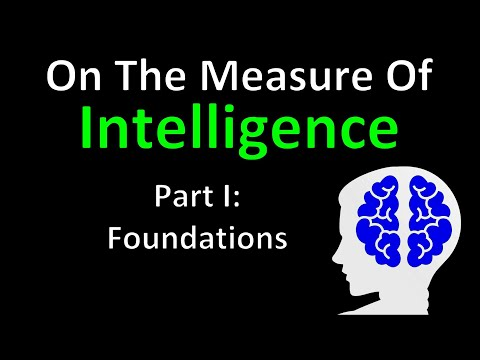

In [2]:
YouTubeVideo('3_qGrmD6iQY', width=853, height=480) # Yannic Kilcher, On the Measure of Intelligence by François Chollet - Part 1: Foundations (Paper Explained) 

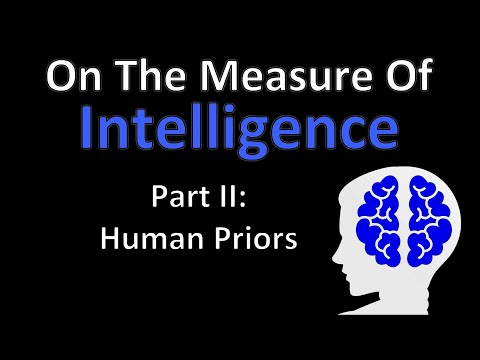

In [4]:
YouTubeVideo('THcuTJbeD34', width=853, height=480) # Yannic Kilcher, On the Measure of Intelligence by François Chollet - Part 2: Human Priors (Paper Explained) 

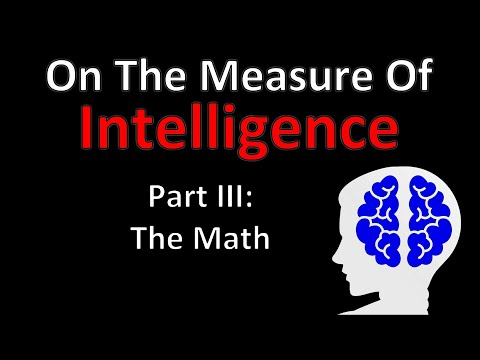

In [5]:
YouTubeVideo('cuyM63ugsxI', width=853, height=480) # Yannic Kilcher, On the Measure of Intelligence by François Chollet - Part 3: The Math (Paper Explained) 

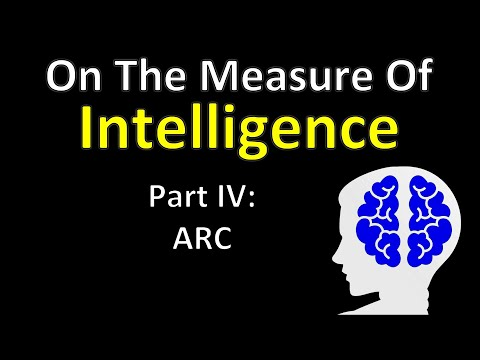

In [6]:
YouTubeVideo('O9kFX33nUcU', width=853, height=480) # Yannic Kilcher, On the Measure of Intelligence by François Chollet - Part 4: The ARC Challenge (Paper Explained) 